# Model to estimate the price of used cars - Part 2

In this notebook a model


### Dependencies needed for this model

* `pandas`: For DataFrames processing 
* `numpy`: Math operations
* `matplotlib`: Graphing data
* `seaborn`: Graphing data
* `scipy`: Getting stadistical info
* `sklearn`: Making regressions

Firstly the libraries are imported and the data saved to a DataFrame from the values on the csv file

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.linear_model import Ridge

pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('clean-data.csv')

___

## Describing the data

Looking for correlations between the different items and the objective value (price).

Some usual steps for starting are:

* Numerical data:
    * Visualizing the correlation between the different attributes and the objetive value.
    * Looking at scatters plots and correlations between specific attributes and the objective value
    * Making ANOVA analysis to find correlations and 

 

* Categorical data:

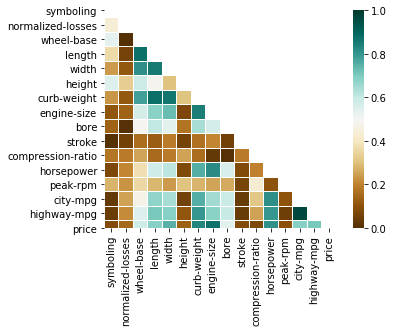

In [3]:

# Using the absolute value since I only care about how much they correlate, and not how positive or negative that correlation is, makes easier for me
corr = abs(df.corr())

# Making a mask to hide half of the graph, since it repeats itself
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

# Graphing
sns.heatmap(corr,
            mask=mask,
            vmax=1,
            vmin=0,
            square=True,
            cmap="BrBG",
            linewidth=0.1)

In [4]:
# The chosen criteria for choosing the attributes for future analysis will be the ones that have a correlation factor above 0.6
attributes=set()

# Debe haber una mejor forma
for  index, corr_factor in enumerate(df.corr()['price']):
    if abs(corr_factor) >= 0.6:
        attributes.add(df.corr()['price'].index[index])
attributes.discard('price')
print(attributes)

{'horsepower', 'width', 'highway-mpg', 'curb-weight', 'engine-size', 'city-mpg', 'length'}


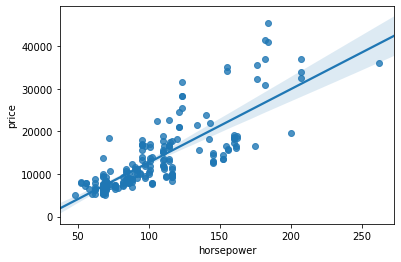

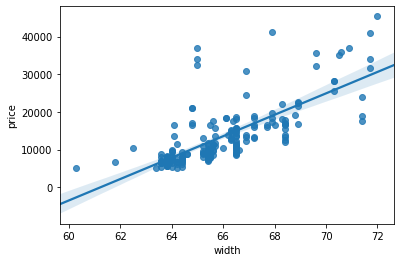

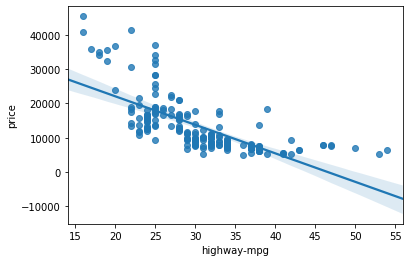

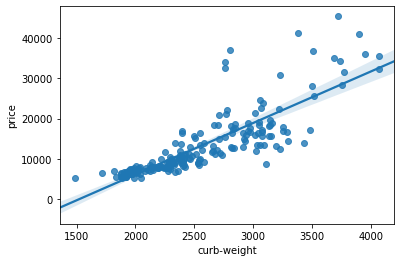

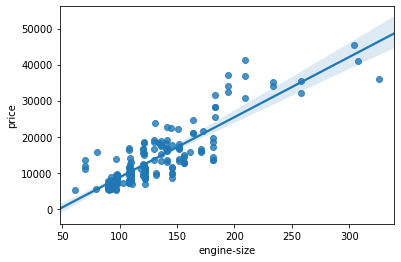

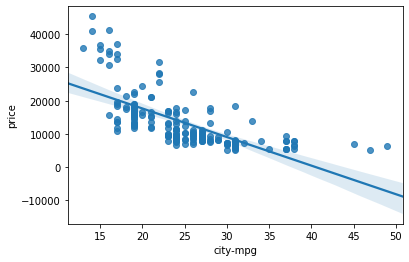

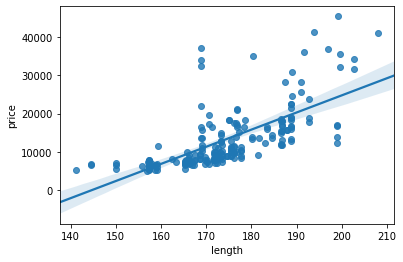

In [5]:
# Graphing a scatter plot of each of the selected attributes
for att in attributes:
    sns.regplot(df[att], df['price'])
    plt.show()

__ANOVA analysis__


symboling :
Pearson coefficent:  -0.08323740052339507
p-value 0.24246791350847122


normalized-losses :
Pearson coefficent:  0.15085304407225822
p-value 0.03343467290973876


wheel-base :
Pearson coefficent:  0.5838416699532558
p-value 1.4200960847992521e-19


length :
Pearson coefficent:  0.6912065018980799
p-value 1.3239620946716034e-29


width :
Pearson coefficent:  0.7516281080865933
p-value 1.8754545226139977e-37


height :
Pearson coefficent:  0.13363878069756144
p-value 0.059865831554287235


curb-weight :
Pearson coefficent:  0.8340594476291079
p-value 8.781207356676491e-53


engine-size :
Pearson coefficent:  0.8721521999503734
p-value 4.443948756998532e-63


bore :
Pearson coefficent:  0.5425621871456983
p-value 1.2567082882372615e-16


stroke :
Pearson coefficent:  0.08432980442414488
p-value 0.2363201261584604


compression-ratio :
Pearson coefficent:  0.0760948515289584
p-value 0.28541349097348756


horsepower :
Pearson coefficent:  0.8118111666659832


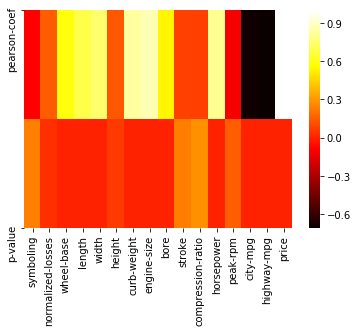

In [6]:
## ANOVA analysis of the numerical data

print('__ANOVA analysis__\n\n')
anova_values = dict()

for column in df:
    try:
        pearson_coef, p_value = stats.pearsonr(df[column],df['price'])
        anova_values[column] = {
            'pearson-coef': pearson_coef,
            'p-value': p_value
        }
        print(column,':')
        print('Pearson coefficent: ',pearson_coef)
        print('p-value',p_value)
        print('\n')
    except:
        #print(f'\n{column} ain\'t numerical data\n')
        None

sns.heatmap(pd.DataFrame(anova_values),cmap='hot')

### Analyzing categorical data

In [7]:
categorical_attributes = set()

for att in df.columns:
    if df[att].dtypes == 'object':
        categorical_attributes.add(att)

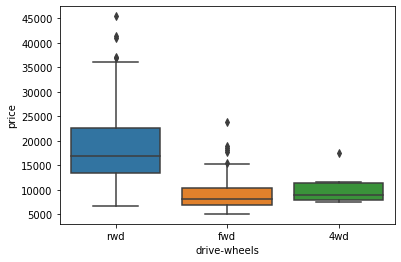

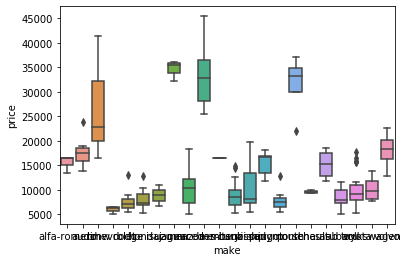

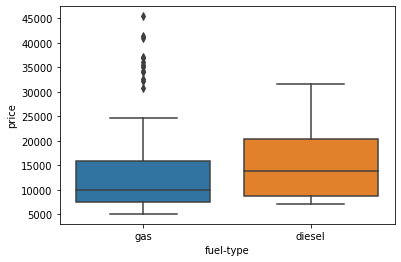

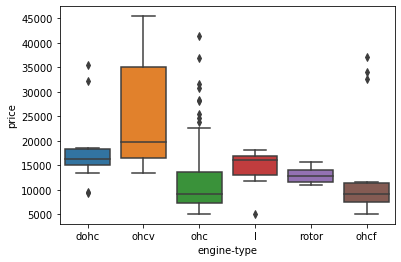

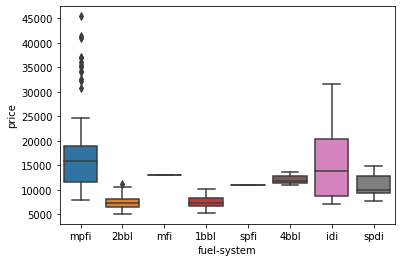

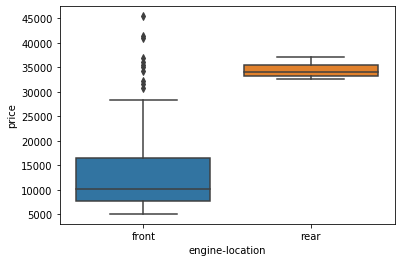

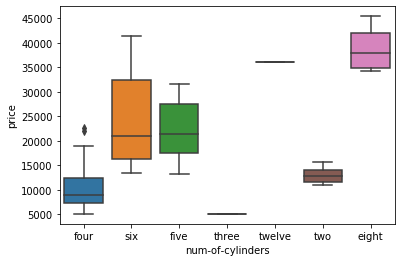

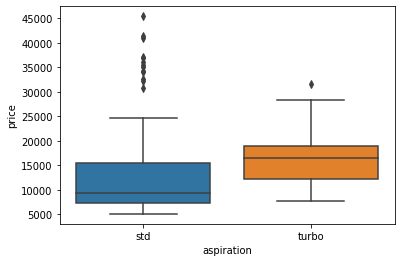

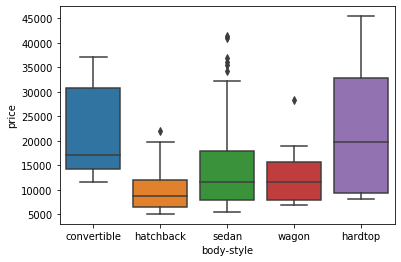

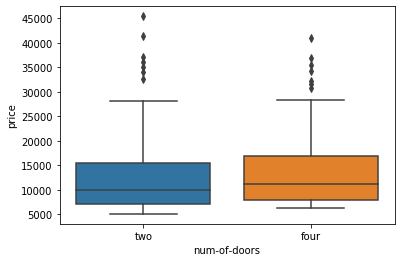

In [8]:
for att in categorical_attributes:
    sns.boxplot(x=att, y='price', data=df)
    plt.show()

In [9]:
categorical_attributes = {'body-style','engine-location', 'make','num-of-cylinders'}

In [10]:
df.describe(include='object')

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,199,199,199,199,199,199,199,199,199,199
unique,22,2,2,2,5,3,2,6,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,180,164,113,92,116,196,143,155,91


### Some important methods to work with categorical data

In [11]:
df.describe(include='object')
df[att].value_counts()
df[att].value_counts().to_frame()
df[att].unique()
df['num-of-cylinders'].value_counts()

four      155
six        24
five       10
eight       4
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [12]:
### Grouping categorical data

In [13]:
cat = list(categorical_attributes)
cat+=['price']
grouped_df = df[cat]
grouped_df

,num-of-cylinders,make,body-style,engine-location,price
0,four,alfa-romero,convertible,front,13495.0
1,four,alfa-romero,convertible,front,16500.0
2,six,alfa-romero,hatchback,front,16500.0
3,four,audi,sedan,front,13950.0
4,five,audi,sedan,front,17450.0
...,...,...,...,...,...
194,four,volvo,sedan,front,16845.0
195,four,volvo,sedan,front,19045.0
196,six,volvo,sedan,front,21485.0
197,six,volvo,sedan,front,22470.0


In [14]:
grouped_df.groupby(['num-of-cylinders','body-style'], as_index=False).mean().pivot(index='num-of-cylinders',columns='body-style')

price                                       \
body-style       convertible  hardtop     hatchback         sedan   
num-of-cylinders                                                    
eight               35056.00  45400.0           NaN  37572.000000   
five                     NaN  28176.0           NaN  20676.000000   
four                14814.75   9384.0   9044.245614  10926.811594   
six                 37028.00  33278.0  17392.166667  25387.538462   
three                    NaN      NaN   5151.000000           NaN   
twelve                   NaN      NaN           NaN  36000.000000   
two                      NaN      NaN  13020.000000           NaN   

                                
body-style               wagon  
num-of-cylinders                
eight                      NaN  
five              23584.000000  
four              11046.761905  
six               15074.500000  
three                      NaN  
twelve                     NaN  
two                        NaN

# Developing the model

A mathematical model to predict values based on the data can be devoloped in virtually unlimited ways. The most commons ones are:

* Linear Regression
* Multiple Linear Regression

### Multiple Linear Regression Model

For linear regression modeling the sklearn module will be used.

In [15]:
# First the creation of a LinearRegression object is created

lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# Defining the X and Y values for linear regression
#  in this case, the X value will be all the numerical attributes that were defined earlier as of interest
X = df[attributes]
Y = df['price']

In [17]:
# Now all the data will be fitted to a linear model
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# Definition of a linear estimate, based on the original X
Yhat = lm.predict(X)

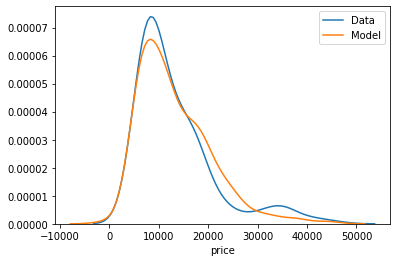

In [19]:
# On MLR the best way to check how fitting is the model is making distribution plots of the model's data and the real data

sns.distplot(Y,hist=False,label='Data')
sns.distplot(Yhat,hist=False,label='Model')
plt.show()

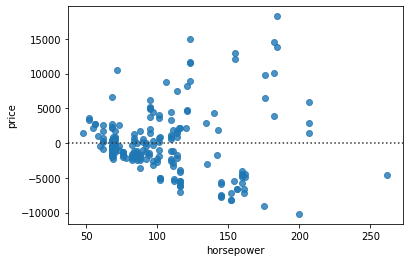

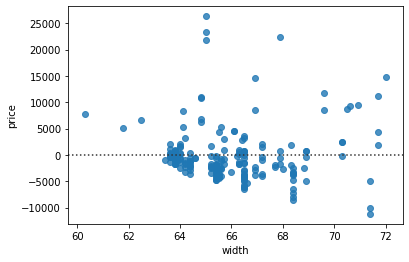

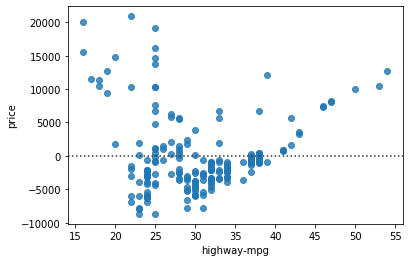

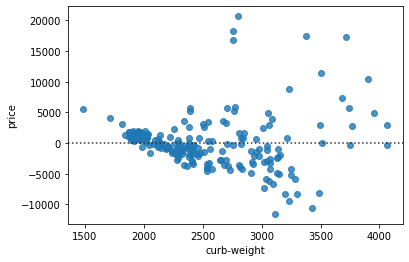

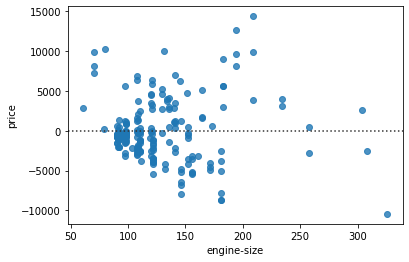

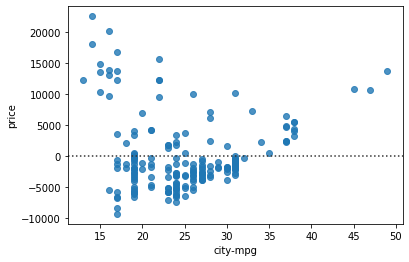

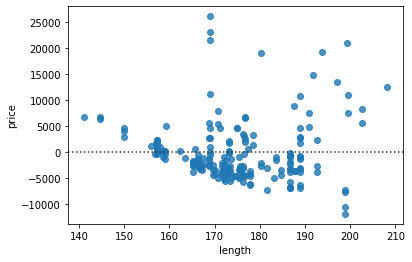

In [20]:
# While overal it fits the data, it can be improved.

# Checking if the residuals are randomly spread, that indicates if the kind of regression is adequate
for att in attributes:
    sns.residplot(df[att],df['price'])
    plt.show()

Some of the data doesn't totally fit with a linear model, this is mostly evident at both *-mpg attributes, for those attributes a polynomial model will be tried.

Testing different orders of polynomical regressions:

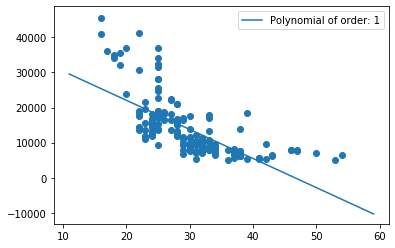

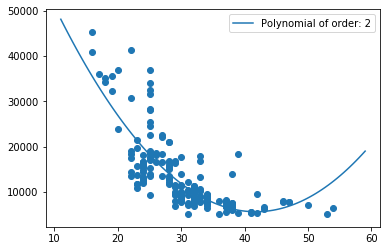

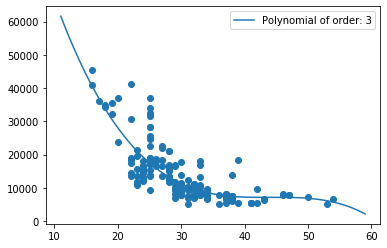

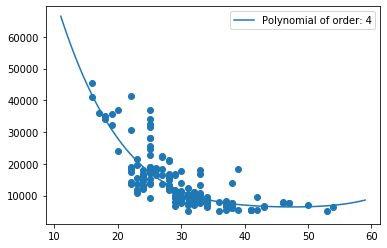

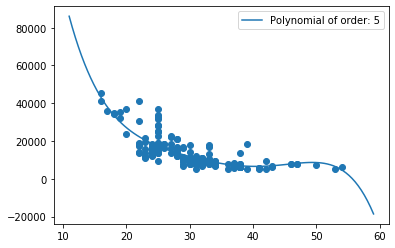

In [21]:
x = df['highway-mpg']
x_space = np.linspace(x.min()-5,x.max()+5,100)

for i in range(1,6):
    
    f = np.polyfit(x,Y,i)
    p = np.poly1d(f)

    plt.plot(x_space,p(x_space), label = f'Polynomial of order: {i}')
    plt.scatter(x,Y)
    plt.legend()
    plt.show()

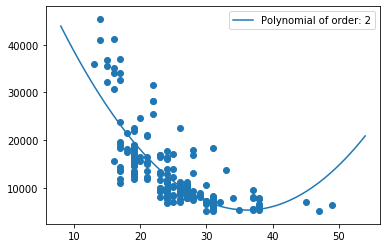

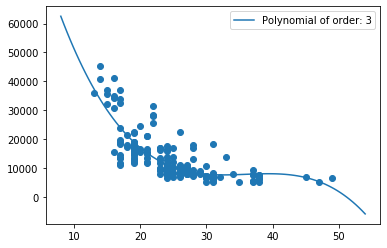

In [22]:
x = df['city-mpg']
x_space = np.linspace(x.min()-5,x.max()+5,100)

for i in range(2,4):
    
    f = np.polyfit(x,Y,i)
    p = np.poly1d(f)

    plt.plot(x_space,p(x_space), label = f'Polynomial of order: {i}')
    plt.scatter(x,Y)
    plt.legend()
    plt.show()

 In both cases the polynomial of order 3 seems to be the best case, so it's the one that will be used

A multiple variable polinomyal model is of the kind:

$ Y = K_1Z_{[0]}^2 + K_2Z_{[0]}Z_{[1]} + K_3Z[1]^2  $

In [23]:
# Spliting the data into train data and model testing (evaluation) data

Here it's evident that, while the model fits extremely well to the train data, it develops poorly with the train data, that's because it's overfitting, so the polynomal regression of order 3 doesn't seems to ve a valid one.

The following script will iterate through a range of test data size and degrees for polynomical regression, then it will find wich values of each will give the biggest R² value between the **model** and the **test data**

In [105]:
deg = []
r_test = []
r_train = []

mse_test = []
mse_train = []

max_r = 0
max_d = 0
max_test = 0

for test_size in range(1,100,5):
    
    # Making subgroups of data 
    x_train, x_test, y_train, y_test = train_test_split(df[attributes], df['price'], test_size=test_size/100, random_state=0)
    
    for degree in range(1,5):
        
        # Definition of PolynomialFeatures
        poly_train = PolynomialFeatures(degree=degree)

        # Transformation of independent variables
        Z_train_poly = poly_train.fit_transform(x_train) # -> This returns an array of the kind [..[1., Z[0], Z[1], Z[0]**2, Z[0]*Z[1], Z[1]**2]..]
        Z_test_poly = poly_train.fit_transform(x_test)

        # Fitting the train data
        reg = LinearRegression().fit(Z_train_poly,y_train)

        # Calculation of r² and mse
        
        r_2 = r2_score(reg.predict(Z_test_poly),y_test)
        mse = mean_squared_error(reg.predict(Z_test_poly),y_test)
        
        deg.append(degree)
        
        r_test.append(r_2)
        r_train.append(r2_score(reg.predict(Z_train_poly),y_train))

        mse_test.append(mse)
        mse_train.append(mean_squared_error(reg.predict(Z_train_poly),y_train))
        
        if r_2 > max_r:
            max_r = r_2
            max_d = degree
            max_test = test_size
            max_model = reg
            

print(f'''
Best R² was {max_r}
at:
degree: {max_d}
test_size: {max_test}%
''')


Best R² was 0.9063063175982128
at:
degree: 2
test_size: 21%



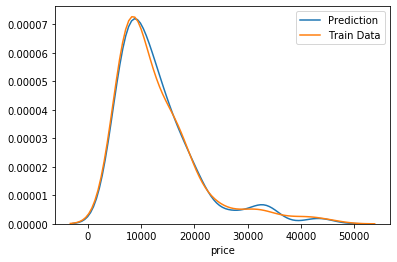

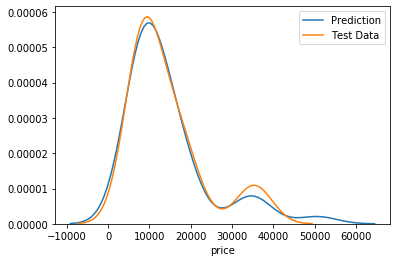

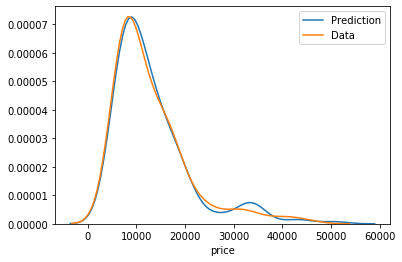

In [123]:
x_train, x_test, y_train, y_test = train_test_split(df[attributes], df['price'], test_size=max_test/100, random_state=0)
reg = max_model
degree = max_d

poly_train = PolynomialFeatures(degree=degree)
Z_train_poly = poly_train.fit_transform(x_train) # -> This returns an array of the kind [..[1., Z[0], Z[1], Z[0]**2, Z[0]*Z[1], Z[1]**2]..]
Z_test_poly = poly_train.fit_transform(x_test)
Z_all_polly = poly_train.fit_transform(df[attributes])

reg = LinearRegression().fit(Z_train_poly,y_train)

# Comparing the train model with the train data
sns.distplot(reg.predict(Z_train_poly),hist=False, label='Prediction')
sns.distplot(y_train,hist=False,label='Train Data')
plt.show()

# Predicting the eval model and comparing with the test data
sns.distplot(reg.predict(Z_test_poly),hist=False, label='Prediction')
sns.distplot(y_test,hist=False,label='Test Data')
plt.show()

# Comparing the train model with all the data
sns.distplot(reg.predict(Z_all_polly),hist=False, label='Prediction')
sns.distplot(y_train,hist=False,label='Data')
plt.show()

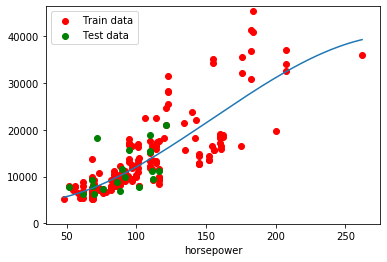

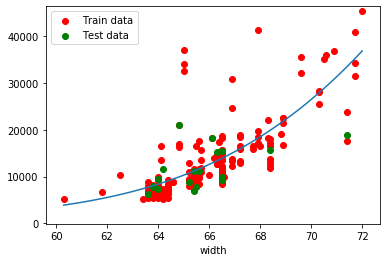

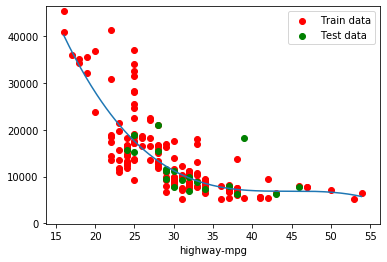

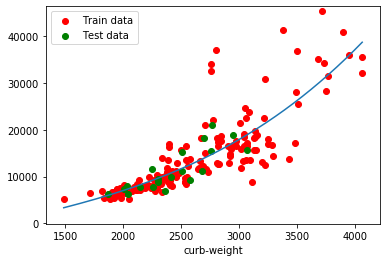

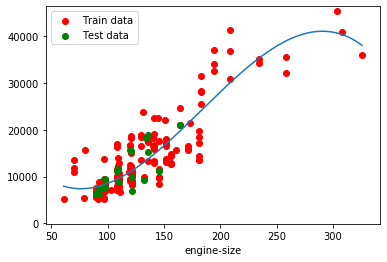

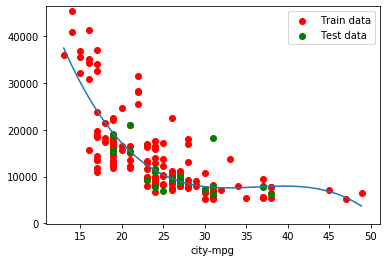

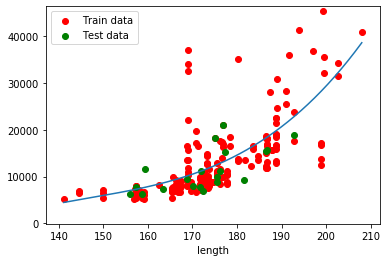

In [114]:
# Checking each attribute's regression

for att in attributes:
    x_ex_train = x_train[[att]]
    x_ex_test = x_test[[att]]
    y_ex_train = y_train
    y_ex_test = y_test

    pf = PolynomialFeatures(degree=degree)

    x_ex_reg = pf.fit_transform(x_ex_train)

    ex_reg = LinearRegression()
    ex_reg.fit(x_ex_reg, y_ex_train)

    x_range = pf.fit_transform(
        np.linspace(
            x_ex_train.min(),
            x_ex_train.max(),100).reshape(-1, 1))

    x_range=np.arange(
        min([x_ex_train.values.min(),x_ex_test.values.min()]),
        max([x_ex_train.values.max(), x_ex_test.values.max()]),
        0.1
    )
    
    plt.plot(x_range,ex_reg.predict(pf.fit_transform(x_range.reshape(-1,1))))
    plt.scatter(x_ex_train,y_ex_train,color='red',label = 'Train data')
    plt.scatter(x_ex_test,y_ex_test, color='green',label='Test data')
    plt.xlabel(att)
    plt.legend()
    plt.ylim([-100,df['price'].max()+1000])
    plt.show()

Checking the model with different sizes of test data

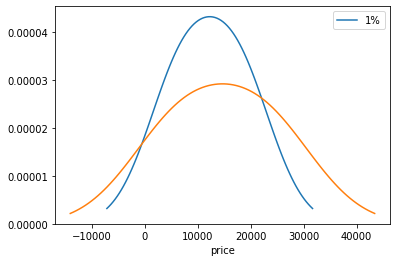

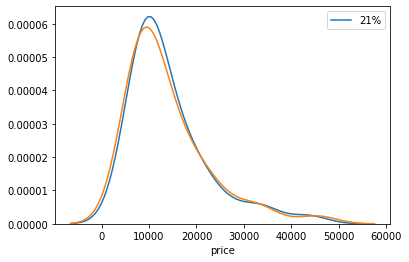

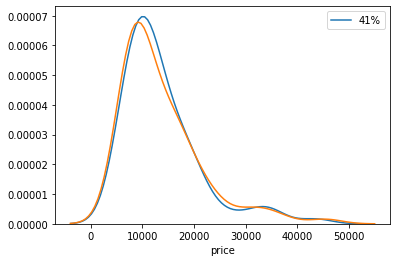

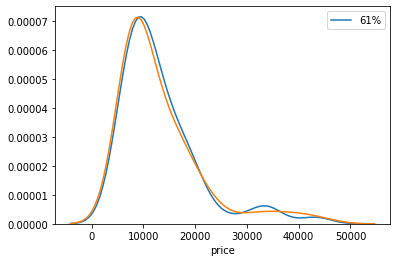

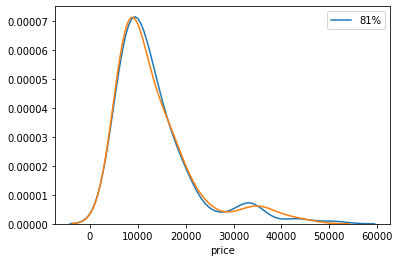

In [135]:
for i in range(1,100,20):    
    x_train, x_test, y_train, y_test = train_test_split(df[attributes], df['price'], test_size = i/100,random_state=50)
    x_test = PolynomialFeatures(degree=degree).fit_transform(x_test)
    sns.distplot(reg.predict(x_test),hist=False,label=f'{i}%')
    sns.distplot(y_test,hist=False)
    plt.legend()
    plt.show()    

Testing with a Ridge model to see if the model is overfitting

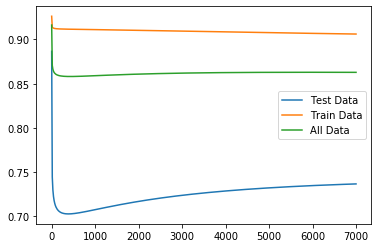

In [164]:
x_train, x_test, y_train, y_test = train_test_split(df[attributes], df['price'], test_size=max_test/100, random_state=0)

rtrain=[]
rtest=[]
rall=[]
ALPHA = np.linspace(0,7000,500)

for alpha in ALPHA:
    ridge_model = Ridge(alpha=alpha)
    ridge_fit = ridge_model.fit(Z_train_poly,y_train)
    sns.distplot(ridge_fit.predict(Z_test_poly),hist=False)
    
    #print('Val Data:    ',ridge_model.score(Z_test_poly,y_test))
    rtest.append(ridge_model.score(Z_test_poly,y_test))
    
    #print('Train Data:  ',ridge_model.score(Z_train_poly,y_train))
    rtrain.append(ridge_model.score(Z_train_poly,y_train))
    
    #print('All Data:    ',ridge_model.score(Z_all_polly,Y))
    rall.append(ridge_model.score(Z_all_polly,Y))    

plt.clf()
plt.plot(ALPHA,rtest,label='Test Data')
plt.plot(ALPHA,rtrain,label='Train Data')
plt.plot(ALPHA,rall,label='All Data')
plt.legend()
plt.show()

In [182]:
sorted(r_test)[::-1]

[0.9063063175982128,
 0.9008231726824346,
 0.8986693931133551,
 0.885446205840501,
 0.8346438542894632,
 0.8258722210392067,
 0.8255692906001294,
 0.8165055516517694,
 0.812901735225711,
 0.8111067548483186,
 0.7942503959678289,
 0.7917251004858952,
 0.7913869008445681,
 0.7901370870383873,
 0.7776753518538664,
 0.7745459849587234,
 0.7645890174949238,
 0.7550374415081326,
 0.7499992154489716,
 0.7117568712979634,
 0.7099834482689635,
 0.6852443168364064,
 0.6832259712964206,
 0.643764304063104,
 0.5696761392455776,
 0.5487024573644561,
 0.5245436194796554,
 0.45643796950281357,
 0.45088911011815835,
 0.4442035628431912,
 0.420347244333348,
 0.3630282321601901,
 0.351913585375598,
 0.3433919632645658,
 0.33668032729031483,
 0.3275484919750158,
 0.31405432965798996,
 0.2893240000884638,
 0.2732100280808075,
 0.26205682794386487,
 0.25448420917997283,
 0.22550076583056566,
 0.2146314293140359,
 0.20123969174680378,
 0.13472858096259022,
 0.12242457333255297,
 0.06301271663244923,
 0.0402